In [1]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
import gensim
import csv
import json
import nltk
from gensim import corpora, models
import numpy as np
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import itertools
from matplotlib import pyplot
from gensim.models.ldamulticore import LdaMulticore
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
import math
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36"}

In [3]:
reviewdf = pd.DataFrame(columns = ['movie', 'review_score', 'review_title', 'review', 'user', 'date'])

In [10]:
count = 0

In [22]:
source = requests.get('https://www.imdb.com/search/title/?title_type=movie&start='+str(count+1)+'&explore=title_type,genres&ref_=adv_nxt', headers = headers).text
soup = BeautifulSoup(source, 'html.parser')

pages = 20 #set amount of pages to browse for movies
current_page = soup
for page in range(pages):
    blocks = current_page.find('div', class_ = 'article').find('div', class_ = 'lister-list').find_all('div', class_ = 'lister-item mode-advanced')
    for block in blocks:
        count += 1
        print('pages', page+1, 'count', count)
        movie = block.find('h3', class_ = 'lister-item-header').a.text
        movie_code = block.find('div', class_ = 'ribbonize').attrs['data-tconst']
           
        review_page = 'https://www.imdb.com/title/' + movie_code + '/reviews'
        source = requests.get(review_page, headers=headers).text
        soup = BeautifulSoup(source, 'html.parser')
        review_blocks = soup.find('div', class_ = 'lister-list').find_all('div', class_ = 'lister-item mode-detail imdb-user-review collapsable')
        review_blocks[:] = [x for x in review_blocks if x.find('div', class_ = 'ipl-ratings-bar') is not None]
        review_blocks = review_blocks[:30]
        for review_block in review_blocks:
            review_score = review_block.find('span', class_ = 'rating-other-user-rating').span.text
            user = review_block.find('span', class_ = 'display-name-link').a.text
            date = review_block.find('span', class_ = 'review-date').text
            review = review_block.find('div', class_ = 'text show-more__control').text
            review_title = review_block.find('div', class_ = 'lister-item-content').a.text
            reviewdf.loc[len(reviewdf)] = [movie, review_score, review_title, review, user, date]
    
    next_page_button = current_page.find('a', class_ = 'lister-page-next next-page').attrs['href']
    next_page_url = 'https://www.imdb.com' + next_page_button
    source = requests.get(next_page_url, headers = headers).text
    soup = BeautifulSoup(source, 'html.parser')
    current_page = soup
    

pages 1 count 2124
pages 1 count 2125
pages 1 count 2126
pages 1 count 2127
pages 1 count 2128
pages 1 count 2129
pages 1 count 2130
pages 1 count 2131
pages 1 count 2132
pages 1 count 2133
pages 1 count 2134
pages 1 count 2135
pages 1 count 2136
pages 1 count 2137
pages 1 count 2138
pages 1 count 2139
pages 1 count 2140
pages 1 count 2141
pages 1 count 2142
pages 1 count 2143
pages 1 count 2144
pages 1 count 2145
pages 1 count 2146
pages 1 count 2147
pages 1 count 2148
pages 1 count 2149
pages 1 count 2150
pages 1 count 2151
pages 1 count 2152
pages 1 count 2153
pages 1 count 2154
pages 1 count 2155
pages 1 count 2156
pages 1 count 2157
pages 1 count 2158
pages 1 count 2159
pages 1 count 2160
pages 1 count 2161
pages 1 count 2162
pages 1 count 2163
pages 1 count 2164
pages 1 count 2165
pages 1 count 2166
pages 1 count 2167
pages 1 count 2168
pages 1 count 2169
pages 1 count 2170
pages 1 count 2171
pages 1 count 2172
pages 1 count 2173
pages 2 count 2174
pages 2 count 2175
pages 2 coun

pages 9 count 2556
pages 9 count 2557
pages 9 count 2558
pages 9 count 2559
pages 9 count 2560
pages 9 count 2561
pages 9 count 2562
pages 9 count 2563
pages 9 count 2564
pages 9 count 2565
pages 9 count 2566
pages 9 count 2567
pages 9 count 2568
pages 9 count 2569
pages 9 count 2570
pages 9 count 2571
pages 9 count 2572
pages 9 count 2573
pages 10 count 2574
pages 10 count 2575
pages 10 count 2576
pages 10 count 2577
pages 10 count 2578
pages 10 count 2579
pages 10 count 2580
pages 10 count 2581
pages 10 count 2582
pages 10 count 2583
pages 10 count 2584
pages 10 count 2585
pages 10 count 2586
pages 10 count 2587
pages 10 count 2588
pages 10 count 2589
pages 10 count 2590
pages 10 count 2591
pages 10 count 2592
pages 10 count 2593
pages 10 count 2594
pages 10 count 2595
pages 10 count 2596
pages 10 count 2597
pages 10 count 2598
pages 10 count 2599
pages 10 count 2600
pages 10 count 2601
pages 10 count 2602
pages 10 count 2603
pages 10 count 2604
pages 10 count 2605
pages 10 count 260

pages 17 count 2967
pages 17 count 2968
pages 17 count 2969
pages 17 count 2970
pages 17 count 2971
pages 17 count 2972
pages 17 count 2973
pages 18 count 2974
pages 18 count 2975
pages 18 count 2976
pages 18 count 2977
pages 18 count 2978
pages 18 count 2979
pages 18 count 2980
pages 18 count 2981
pages 18 count 2982
pages 18 count 2983
pages 18 count 2984
pages 18 count 2985
pages 18 count 2986
pages 18 count 2987
pages 18 count 2988
pages 18 count 2989
pages 18 count 2990
pages 18 count 2991
pages 18 count 2992
pages 18 count 2993
pages 18 count 2994
pages 18 count 2995
pages 18 count 2996
pages 18 count 2997
pages 18 count 2998
pages 18 count 2999
pages 18 count 3000
pages 18 count 3001
pages 18 count 3002
pages 18 count 3003
pages 18 count 3004
pages 18 count 3005
pages 18 count 3006
pages 18 count 3007
pages 18 count 3008
pages 18 count 3009
pages 18 count 3010
pages 18 count 3011
pages 18 count 3012
pages 18 count 3013
pages 18 count 3014
pages 18 count 3015
pages 18 count 3016


In [2]:
reviewdf.to_csv('review.csv', index = False)

NameError: name 'reviewdf' is not defined

In [6]:
reviewdf = pd.read_csv('review.csv')
review_text = reviewdf['review']
reviewdf.head()

,movie,review_score,review_title,review,user,date
0,Extraction,7,"Great action, zero plot\n",The action scenes are really good. Close comba...,hellspuppy,24 April 2020
1,Extraction,8,If John Wick joined Call of Duty\n,Finally Netflix has finally produced a action ...,andrisyafaat,24 April 2020
2,Extraction,7,A violent film with some seriously good actio...,"In a world that is currently minus new films, ...",jtindahouse,24 April 2020
3,Extraction,7,"From bangladesh, I know an action movie doesn...",I am Bangladeshi. But I know this movie was no...,grshuv,26 April 2020
4,Extraction,5,Action Packed but Completely missed the Envir...,The premise of the movie was supposed to set i...,oritroahmed,24 April 2020


In [7]:
reviewdf.drop("review_title", axis=1)

,movie,review_score,review,user,date
0,Extraction,7,The action scenes are really good. Close comba...,hellspuppy,24 April 2020
1,Extraction,8,Finally Netflix has finally produced a action ...,andrisyafaat,24 April 2020
2,Extraction,7,"In a world that is currently minus new films, ...",jtindahouse,24 April 2020
3,Extraction,7,I am Bangladeshi. But I know this movie was no...,grshuv,26 April 2020
4,Extraction,5,The premise of the movie was supposed to set i...,oritroahmed,24 April 2020
5,Extraction,10,"Just a good solid action flick, Hemsworth does...",Chris_Mac_25,24 April 2020
6,Extraction,7,"I'm not much of a writer, so I'll keep the rev...",Mayrise,25 April 2020
7,Extraction,7,The latest Netflix original film to arrive on ...,jackransom-69832,24 April 2020
8,Extraction,5,How on earth a movie of this level have litera...,coldbloded,24 April 2020
9,Extraction,7,I don't care how it portrayed Dhaka. It was a ...,mmibappybd,24 April 2020


ValueError: shape mismatch: objects cannot be broadcast to a single shape

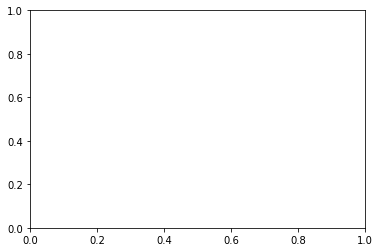

In [156]:
plt.bar(np.arange(1, 11), np.bincount(resultdf.loc[resultdf['actual'] == score]['rounded'])[1:]) 
plt.show()
plt.hist(reviewdf['review_score'])
plt.show()

In [158]:
np.bincount(resultdf.loc[resultdf['actual'] == score]['rounded'])

NameError: name 'resultdf' is not defined

In [5]:
review_text = review_text.apply(lambda x: x.strip())
review_text = review_text.apply(lambda x: x.lower())
review_text = review_text.apply(lambda x: x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))))
review_text = review_text.apply(lambda x: word_tokenize(x))
review_text = review_text.apply(lambda x: [i for i in x if len(i) >= 3])
review_text = review_text.apply(lambda x: [i for i in x if i not in stopwords.words("english")])
lemmatizer = WordNetLemmatizer()
review_text = review_text.apply(lambda x: [lemmatizer.lemmatize(i, pos="v") for i in x])

In [6]:
file_review_text = open('review_text.xml', 'wb') 
pickle.dump(review_text, file_review_text)

In [4]:
filehandler = open('review_text.xml', 'rb') 
review_text = pickle.load(filehandler)

In [5]:
review_dictionary = gensim.corpora.Dictionary(review_text)
print('Total documents:', review_dictionary.num_docs)
print('Total words:', review_dictionary.num_pos)
print('Distinct words:', len(review_dictionary))

Total documents: 50828
Total words: 6184990
Distinct words: 80735


In [6]:
review_dictionary.filter_extremes(no_below = 100, no_above=0.7)
print('Total documents:', review_dictionary.num_docs)
print('Total words:', review_dictionary.num_pos)
print('Distinct words:', len(review_dictionary))

Total documents: 50828
Total words: 6184990
Distinct words: 5397


In [8]:
review_bow_corpus = [review_dictionary.doc2bow(doc) for doc in review_text]

In [10]:
review_lda_model = gensim.models.LdaMulticore(review_bow_corpus, 
                                   num_topics = 50,
                                   id2word = review_dictionary,                                    
                                   passes = 50,
                                   workers = 4,
                                   alpha = 0.02,
                                   eta = 0.1
                                   
                                   )
for idx, topic in review_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

KeyboardInterrupt: 

In [27]:
review_tfidf = models.TfidfModel(review_bow_corpus)
review_corpus_tfidf = review_tfidf[review_bow_corpus]

NameError: name 'review_bow_corpus' is not defined

In [27]:
for idx, topic in review_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.045*"jim" + 0.043*"jennifer" + 0.041*"stone" + 0.036*"bruce" + 0.036*"batman" + 0.025*"willis" + 0.024*"knight" + 0.023*"arnold" + 0.022*"nolan" + 0.021*"morgan"
Topic: 1 
Words: 0.044*"school" + 0.025*"girl" + 0.024*"high" + 0.023*"kid" + 0.019*"young" + 0.015*"girls" + 0.015*"teen" + 0.014*"old" + 0.013*"friends" + 0.012*"boy"
Topic: 2 
Words: 0.019*"man" + 0.017*"comic" + 0.015*"action" + 0.015*"franchise" + 0.014*"character" + 0.014*"first" + 0.012*"hero" + 0.012*"marvel" + 0.011*"villain" + 0.011*"superhero"
Topic: 3 
Words: 0.051*"voice" + 0.048*"animation" + 0.035*"animate" + 0.024*"character" + 0.023*"story" + 0.018*"toy" + 0.018*"pixar" + 0.018*"allen" + 0.016*"woody" + 0.011*"age"
Topic: 4 
Words: 0.215*"film" + 0.032*"see" + 0.017*"watch" + 0.017*"think" + 0.015*"one" + 0.015*"like" + 0.013*"say" + 0.013*"time" + 0.013*"would" + 0.012*"make"
Topic: 5 
Words: 0.023*"bill" + 0.017*"cage" + 0.015*"billy" + 0.014*"one" + 0.014*"christmas" + 0.013*"get" + 0.013

In [22]:
review_tfidf_lda_model =  gensim.models.LdaMulticore(review_corpus_tfidf, 
                                   num_topics = 50,
                                   id2word = review_dictionary,                                    
                                   passes = 50,
                                   workers = 4,
                                   alpha = 0.02,
                                   eta = 0.1
                                   )
for idx, topic in review_tfidf_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.046*"batman" + 0.044*"mel" + 0.037*"gibson" + 0.021*"oldman" + 0.020*"lethal" + 0.020*"brook" + 0.017*"weapon" + 0.016*"joker" + 0.015*"holmes" + 0.014*"glover"
Topic: 1 
Words: 0.040*"allen" + 0.038*"woody" + 0.027*"annie" + 0.010*"hall" + 0.007*"orphan" + 0.006*"buzz" + 0.005*"kathy" + 0.005*"bat" + 0.002*"keaton" + 0.002*"molly"
Topic: 2 
Words: 0.030*"kilmer" + 0.027*"val" + 0.001*"splendid" + 0.001*"specially" + 0.000*"natural" + 0.000*"resistance" + 0.000*"favourites" + 0.000*"saint" + 0.000*"security" + 0.000*"parent"
Topic: 3 
Words: 0.024*"hockey" + 0.019*"pixar" + 0.018*"toy" + 0.018*"nemo" + 0.000*"andy" + 0.000*"hire" + 0.000*"dish" + 0.000*"250" + 0.000*"mini" + 0.000*"alexander"
Topic: 4 
Words: 0.042*"miyazaki" + 0.034*"anime" + 0.024*"13th" + 0.016*"friday" + 0.012*"castle" + 0.010*"howl" + 0.007*"nope" + 0.004*"sky" + 0.002*"sophie" + 0.001*"1980"
Topic: 5 
Words: 0.020*"roth" + 0.013*"fever" + 0.008*"senseless" + 0.007*"cabin" + 0.001*"rider" + 0.00

In [29]:
review_lda_model.save('review_lda.model')
review_tfidf_lda_model.save('review_tfidf_lda.model')

In [2]:
review_lda_model = LdaMulticore.load('review_lda.model')
review_tfidf_lda_model = LdaMulticore.load('review_tfidf_lda.model')

In [38]:
lda_data = []
for i in range(len(reviewdf)):
    top_topics = review_lda_model.get_document_topics(review_bow_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(50)]
    lda_data.append(topic_vec)
ldadf = pd.DataFrame(lda_data)

In [39]:
ldadf.to_csv('lda.csv', index = False)

In [3]:
ldadf = pd.read_csv('lda.csv')

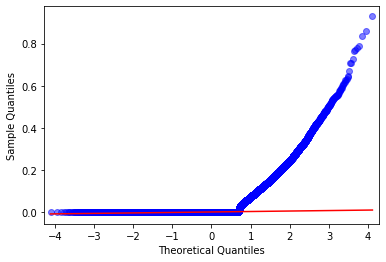

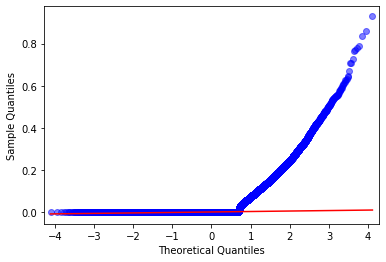

In [147]:
sm.graphics.qqplot(ldadf['41'], line='q', alpha=0.5)

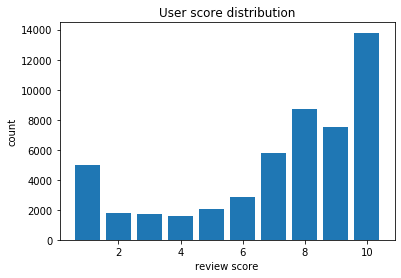

In [182]:
plt.bar(np.arange(1, 11), np.bincount(reviewdf['review_score'])[1:]) 
plt.title('User score distribution')
plt.xlabel('review score')
plt.ylabel('count')
plt.show()

In [9]:
corrs = []
for column in ldadf:
    corrs.append([spearmanr(ldadf[column], reviewdf['review_score'])[0], column])

In [13]:
corrs.sort(key=lambda x: abs(x[0]), reverse=True)
corrs_df = pd.DataFrame(corrs, columns=['correlation', 'topic'])

In [14]:
corrs_df

,correlation,topic
0,-0.385022,19
1,0.216887,42
2,-0.213998,31
3,-0.197419,41
4,-0.194240,15
5,0.166897,27
6,0.102537,46
7,-0.095389,36
8,0.091004,25
9,-0.087890,22


In [66]:
topics = [19,31,42,27,25,15]
for topic in topics:
    print('topic', topic, ':', review_lda_model.print_topic(topic, topn = 40),'\n')

NameError: name 'review_lda_model' is not defined

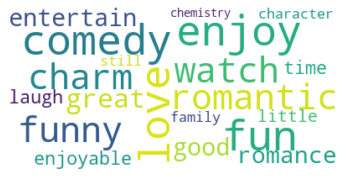

In [68]:
# Start with one review:
text = review_lda_model.print_topic(0, topn = 20)



wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

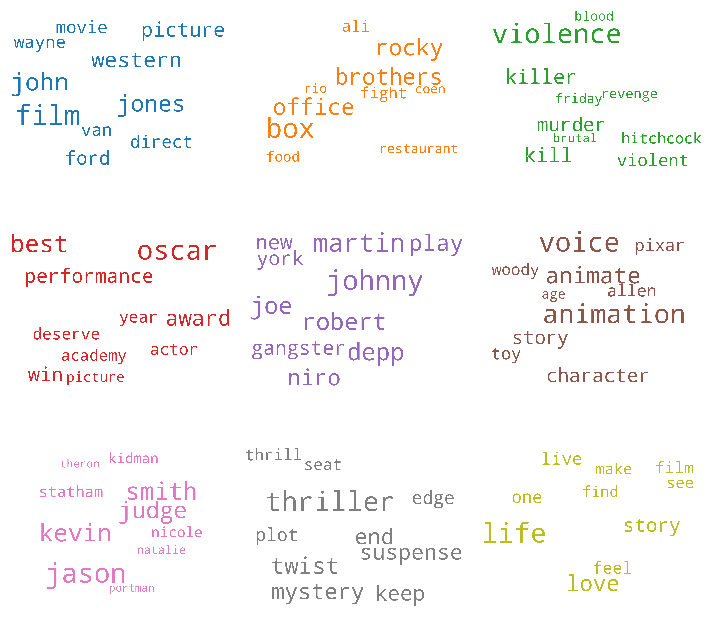

In [123]:
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = review_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [107]:
review_lda_model.show_topics(formatted=False)

[(10,
  [('people', 0.029897045),
   ('world', 0.015853258),
   ('movie', 0.012117489),
   ('message', 0.011856073),
   ('life', 0.0110103795),
   ('make', 0.01050765),
   ('show', 0.009889315),
   ('think', 0.009720154),
   ('many', 0.0093425205),
   ('live', 0.008790739)]),
 (42,
  [('film', 0.03821418),
   ('great', 0.035273757),
   ('love', 0.025180181),
   ('movie', 0.01851591),
   ('character', 0.017813034),
   ('one', 0.017297883),
   ('best', 0.017089438),
   ('cast', 0.016759336),
   ('act', 0.015438074),
   ('performance', 0.0148136895)]),
 (9,
  [('jason', 0.1748027),
   ('kevin', 0.13903856),
   ('smith', 0.1346311),
   ('judge', 0.12582083),
   ('statham', 0.041225847),
   ('nicole', 0.03550577),
   ('kidman', 0.03426961),
   ('natalie', 0.023176895),
   ('theron', 0.020200174),
   ('portman', 0.01960403)]),
 (49,
  [('music', 0.091607064),
   ('sing', 0.034869216),
   ('song', 0.032752406),
   ('musical', 0.032390755),
   ('songs', 0.030253706),
   ('dance', 0.030076927),

In [293]:
ldadf['wordcount'] = minmax_scale(wordcounts_lda)

In [292]:
minmax_scale(wordcounts_lda)

array([0.08395062, 0.01358025, 0.17407407, ..., 0.07160494, 0.01234568,
       0.11358025])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(ldadf, reviewdf['review_score'], test_size=0.2)

In [270]:
reviewdf

,movie,review_score,review_title,review,user,date,std_score
0,Extraction,7,"Great action, zero plot\n",The action scenes are really good. Close comba...,hellspuppy,24 April 2020,0.666667
1,Extraction,8,If John Wick joined Call of Duty\n,Finally Netflix has finally produced a action ...,andrisyafaat,24 April 2020,0.777778
2,Extraction,7,A violent film with some seriously good actio...,"In a world that is currently minus new films, ...",jtindahouse,24 April 2020,0.666667
3,Extraction,7,"From bangladesh, I know an action movie doesn...",I am Bangladeshi. But I know this movie was no...,grshuv,26 April 2020,0.666667
4,Extraction,5,Action Packed but Completely missed the Envir...,The premise of the movie was supposed to set i...,oritroahmed,24 April 2020,0.444444
5,Extraction,10,Great action flick\n,"Just a good solid action flick, Hemsworth does...",Chris_Mac_25,24 April 2020,1.000000
6,Extraction,7,"OK Plot, Immense Action Scenes, Hemsworth Nai...","I'm not much of a writer, so I'll keep the rev...",Mayrise,25 April 2020,0.666667
7,Extraction,7,Extraction\n,The latest Netflix original film to arrive on ...,jackransom-69832,24 April 2020,0.666667
8,Extraction,5,Disappointment for the story\n,How on earth a movie of this level have litera...,coldbloded,24 April 2020,0.444444
9,Extraction,7,Great Action Scenes\n,I don't care how it portrayed Dhaka. It was a ...,mmibappybd,24 April 2020,0.666667


In [14]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [160]:
predictions = rf.predict(x_test)

NameError: name 'rf' is not defined

In [16]:
errors = abs(predictions - y_test)
np.average(errors)

1.433497992842622

In [161]:
resultdf = pd.DataFrame(list(zip(predictions,y_test)),columns = ['predict', 'actual'])

NameError: name 'predictions' is not defined

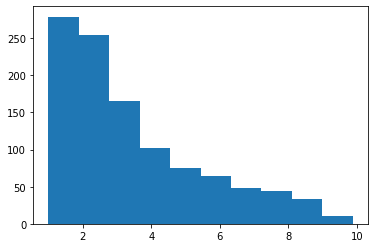

In [181]:
plt.hist(resultdf.loc[resultdf['actual'] == 1]['predict'])
plt.show()

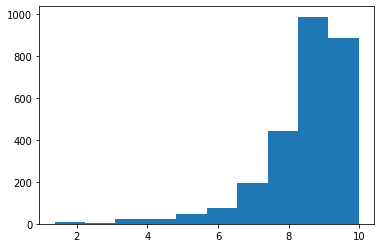

In [19]:
plt.hist(resultdf.loc[resultdf['actual'] == 10]['predict'])
plt.show()

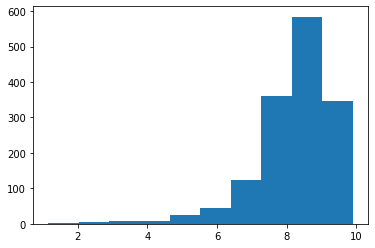

In [20]:
plt.hist(resultdf.loc[resultdf['actual'] == 9]['predict'])
plt.show()

In [140]:
ldadf.loc[reviewdf['review_score'] == 9].mean().sort_values(ascending=False)

18    0.064656
12    0.059488
9     0.059481
20    0.047710
37    0.047637
0     0.041274
42    0.039812
10    0.039282
17    0.035800
2     0.032035
8     0.027951
21    0.026686
1     0.024355
48    0.023116
44    0.021763
34    0.020977
29    0.019867
22    0.019659
33    0.019129
6     0.017631
35    0.017141
39    0.016909
25    0.016761
5     0.016587
43    0.014372
38    0.013821
40    0.013669
46    0.012778
45    0.012767
16    0.011399
27    0.011280
3     0.011088
47    0.010645
7     0.009947
31    0.009813
41    0.009623
11    0.009268
23    0.008976
15    0.008837
24    0.008713
14    0.007959
36    0.007526
13    0.007417
30    0.006790
4     0.006772
19    0.006508
49    0.006242
26    0.006184
32    0.006061
28    0.005837
dtype: float64

In [5]:
review_lda_model.print_topic(12, topn = 30)

NameError: name 'review_lda_model' is not defined

In [8]:
model = Sequential()
model.add(Dense(50, input_dim = x_train.shape[1], activation='selu'))
model.add(Dense(30, activation='selu'))
model.add(Dense(10, activation='selu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split = 0.2)

Train on 32529 samples, validate on 8133 samples
Epoch 1/100
32529/32529 [==============================] - 1s 25us/step - loss: 2.1876 - val_loss: 1.5385
Epoch 2/100
32529/32529 [==============================] - 1s 18us/step - loss: 1.4931 - val_loss: 1.4811
Epoch 3/100
32529/32529 [==============================] - 1s 18us/step - loss: 1.4411 - val_loss: 1.4186
Epoch 4/100
32529/32529 [==============================] - 1s 18us/step - loss: 1.3987 - val_loss: 1.3855
Epoch 5/100
32529/32529 [==============================] - 1s 18us/step - loss: 1.3765 - val_loss: 1.3691
Epoch 6/100
32529/32529 [==============================] - 1s 17us/step - loss: 1.3594 - val_loss: 1.3515
Epoch 7/100
32529/32529 [==============================] - 1s 18us/step - loss: 1.3452 - val_loss: 1.3357
Epoch 8/100
32529/32529 [==============================] - 1s 17us/step - loss: 1.3319 - val_loss: 1.3311
Epoch 9/100
32529/32529 [==============================] - 1s 18us/step - loss: 1.3240 - val_loss: 1.36

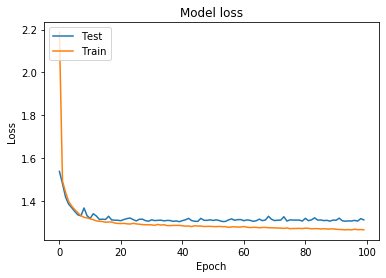

In [11]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

In [81]:
np.average(errors)

NameError: name 'errors' is not defined

In [33]:
prediction = model.predict(np.array(x_test))
prediction = list(itertools.chain.from_iterable(prediction))
error = abs(prediction - y_test)
error2 = (prediction - y_test)**2
print(np.mean(error))
print(np.median(error))
print(np.mean(error2))
print(np.median(error2))
print(math.sqrt(sum(error2))/len(error2))

1.3224782943725586
0.88087606
3.8924720287323
0.7759427
0.019567609629030782


In [34]:
resultdf2 = pd.DataFrame(list(zip(prediction, y_test)),columns = ['predict', 'actual']).set_index(y_test.index, drop=False)

In [36]:
#resultdf['rounded'] = round(resultdf['predict'])
resultdf2['rounded'] = round(resultdf2['predict'])

In [37]:
#resultdf.loc[resultdf['rounded'] > 10, 'rounded'] = 10
#resultdf.loc[resultdf['rounded'] < 1, 'rounded'] = 1
resultdf2.loc[resultdf2['rounded'] > 10, 'rounded'] = 10
resultdf2.loc[resultdf2['rounded'] < 1, 'rounded'] = 1

In [16]:
resultdf2.to_csv('result2.csv', index = False)

In [27]:
resultdf2 = pd.read_csv('result2.csv')

In [38]:
resultdf2.loc[resultdf2['predict'] > 10]

,predict,actual,rounded
28142,10.024874,8,10.0
11637,10.025298,10,10.0
49969,10.183709,7,10.0
11900,10.006501,9,10.0
39971,10.011625,10,10.0
11708,10.004782,10,10.0
13829,10.008925,9,10.0
7599,10.125760,10,10.0
48899,10.067623,10,10.0
11381,10.016278,10,10.0


In [39]:
error2 = abs(resultdf2['rounded']-y_test)
print(np.mean(error))
print(np.mean(error2))

1.3224782943725586
1.296970293133976


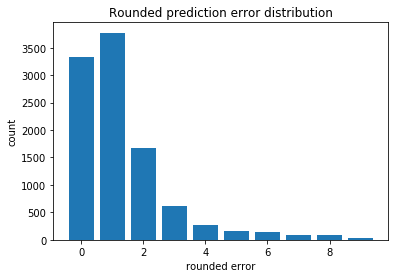

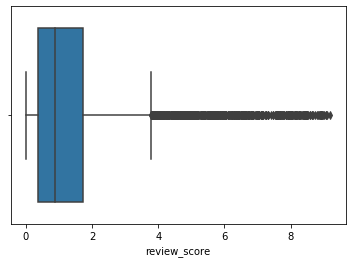

In [40]:
plt.bar(np.arange(0, 10), np.bincount(round(error))) 
plt.title('Rounded prediction error distribution')
plt.xlabel('rounded error')
plt.ylabel('count')
plt.show()
sns.boxplot(x=error)

In [41]:
resultdf2.loc[(resultdf2['actual']==1) & (resultdf2['rounded']==10)]

,predict,actual,rounded
46437,9.954842,1,10.0
1674,10.196235,1,10.0
3795,9.907100,1,10.0
5631,10.071228,1,10.0
1857,9.954842,1,10.0
37995,9.859284,1,10.0
37325,9.880669,1,10.0
15999,9.985932,1,10.0
7770,9.928631,1,10.0
11101,9.630078,1,10.0


In [45]:
reviewdf['review'][3795]

'I am struggling to find a good reason to give you in order to see this movie, but I cannot. I will not stick to how the actors were playing because it was not their fault about the role they had been given. On the other hand I will base my review on the scenario. What was the meaning of the movie? Which was the target of the plot? I did not manage to answer neither of the aforementioned queries. I read that I was going to see a thriller, but I strongly believe that it was a parody of the actual movie which I will see sometime in the future. My opinion is to consider it twice before you see it and you should better give your money to charity than to see this movie.'

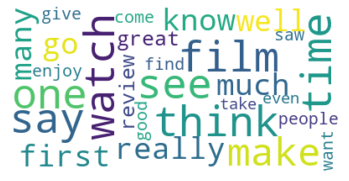

In [131]:
text = review_lda_model.print_topic(4, topn = 30)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [129]:
ldadf.loc[9796].sort_values(ascending=False)

19    0.323984
4     0.282220
31    0.237123
49    0.003333
12    0.003333
21    0.003333
20    0.003333
18    0.003333
17    0.003333
16    0.003333
15    0.003333
14    0.003333
13    0.003333
11    0.003333
23    0.003333
10    0.003333
9     0.003333
8     0.003333
7     0.003333
6     0.003333
5     0.003333
3     0.003333
2     0.003333
1     0.003333
22    0.003333
24    0.003333
48    0.003333
25    0.003333
47    0.003333
46    0.003333
45    0.003333
44    0.003333
43    0.003333
42    0.003333
41    0.003333
40    0.003333
39    0.003333
38    0.003333
37    0.003333
36    0.003333
35    0.003333
34    0.003333
33    0.003333
32    0.003333
30    0.003333
29    0.003333
28    0.003333
27    0.003333
26    0.003333
0     0.003333
Name: 9796, dtype: float64

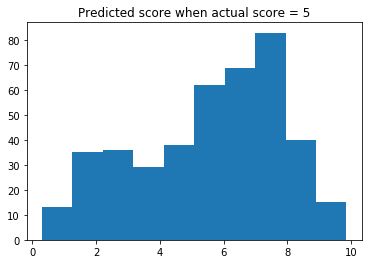

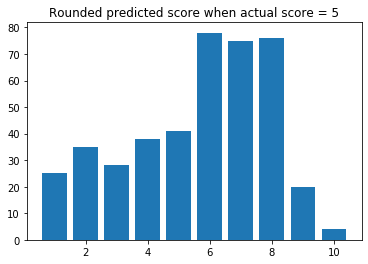

In [99]:
score = 5
plt.title('Predicted score when actual score = ' + str(score))
#plt.xlabel('predicted score')
#plt.ylabel('count')
#plt.hist(resultdf.loc[resultdf['actual'] == score]['predict'])
#plt.show()
plt.hist(resultdf2.loc[resultdf2['actual'] == score]['predict'])
plt.show()
#plt.bar(np.arange(1, 11), np.bincount(resultdf.loc[resultdf['actual'] == score]['rounded'])[1:]) 
#plt.show()
plt.title('Rounded predicted score when actual score = ' + str(score))
plt.bar(np.arange(1, 11), np.bincount(resultdf2.loc[resultdf2['actual'] == score]['rounded'])[1:]) 
plt.show()

In [18]:
np.bincount(resultdf2.loc[resultdf2['actual'] == 1]['rounded'])

array([  0, 285, 366,  78,  46,  47,  31,  49,  53,  39,  17], dtype=int64)

In [181]:
reviewdf['review_score'][43762]

8

In [192]:
reviewdf['review'][10333]

"Unoriginal piece of body-positive propaganda too explicit to re-educate wrong people. Otherwise I wouldn't write this, right?"

In [183]:
ldadf.loc[43762].sort_values(ascending=False)

12    0.449154
8     0.192856
46    0.120410
2     0.113604
16    0.108178
49    0.000351
21    0.000351
20    0.000351
19    0.000351
18    0.000351
17    0.000351
15    0.000351
14    0.000351
13    0.000351
10    0.000351
11    0.000351
23    0.000351
9     0.000351
7     0.000351
6     0.000351
5     0.000351
4     0.000351
3     0.000351
1     0.000351
22    0.000351
24    0.000351
48    0.000351
25    0.000351
47    0.000351
45    0.000351
44    0.000351
43    0.000351
42    0.000351
41    0.000351
40    0.000351
39    0.000351
38    0.000351
37    0.000351
36    0.000351
35    0.000351
34    0.000351
33    0.000351
32    0.000351
31    0.000351
30    0.000351
29    0.000351
28    0.000351
27    0.000351
26    0.000351
0     0.000351
Name: 43762, dtype: float64

In [186]:
review_lda_model.print_topic(46, topn = 30)

'0.075*"school" + 0.041*"game" + 0.041*"high" + 0.026*"teen" + 0.022*"play" + 0.017*"girl" + 0.017*"kid" + 0.015*"rock" + 0.014*"young" + 0.012*"football" + 0.012*"band" + 0.012*"video" + 0.012*"teenage" + 0.010*"girls" + 0.009*"teenagers" + 0.009*"friends" + 0.009*"teacher" + 0.009*"boys" + 0.008*"college" + 0.008*"joan" + 0.008*"teens" + 0.007*"american" + 0.007*"club" + 0.007*"age" + 0.007*"hackman" + 0.007*"80s" + 0.007*"coach" + 0.007*"friend" + 0.007*"popular" + 0.007*"witherspoon"'

In [206]:
list(review_dictionary.values())

['action',
 'actor',
 'already',
 'arts',
 'boy',
 'carry',
 'cast',
 'character',
 'choice',
 'close',
 'combat',
 'crazy',
 'draw',
 'emotion',
 'enjoy',
 'everyone',
 'extremely',
 'feel',
 'fine',
 'game',
 'good',
 'hemsworth',
 'hollywood',
 'impossible',
 'like',
 'long',
 'martial',
 'mission',
 'movie',
 'movies',
 'personally',
 'play',
 'really',
 'recommend',
 'round',
 'scenes',
 'see',
 'shots',
 'show',
 'skills',
 'sometimes',
 'space',
 'story',
 'stunt',
 'team',
 'though',
 'tight',
 'title',
 'type',
 'video',
 'viewers',
 'well',
 'whole',
 'wonderful',
 'chris',
 'disappoint',
 'fast',
 'finally',
 'netflix',
 'pace',
 'produce',
 'also',
 'amaze',
 'appearance',
 'appreciate',
 'away',
 'become',
 'behind',
 'blow',
 'bore',
 'certainly',
 'children',
 'choices',
 'couple',
 'currently',
 'definitely',
 'deliver',
 'dialogue',
 'easy',
 'end',
 'enough',
 'especially',
 'even',
 'film',
 'flawless',
 'fresh',
 'get',
 'give',
 'glad',
 'go',
 'highlight',
 'home'

In [207]:
wordcounts_lda = []

[[(0, 3),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 3),
  (10, 3),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 3),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 3),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(0, 1),
  (21, 1),
  (28, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(0, 3),
  (20, 3),
  (21, 1),
  (28, 1),
  (32, 1),
  (33, 1),
  (35, 1),
  (43, 1),
  (45, 1),
  (51, 1),
  (54, 1),
  (58, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)

In [278]:
#amount of words(preprocessed) affects accuracy

In [257]:
wordcounts_lda = []
for document in review_bow_corpus:
    word_count = 0
    for word in document:
        word_count += word[1]
    wordcounts_lda.append(word_count)

In [258]:
np.median(wordcounts_lda)

78.0

In [316]:
resultdf2['error'] = abs(resultdf2['actual']-resultdf2['predict'])

In [317]:
resultdf2['wordcount'] = [wordcounts_lda[i] for i in resultdf2.index]

In [318]:
spearmanr(resultdf2['wordcount'], resultdf2['actual'])

SpearmanrResult(correlation=0.061026604882102466, pvalue=7.362876002138323e-10)

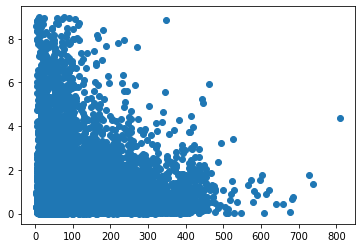

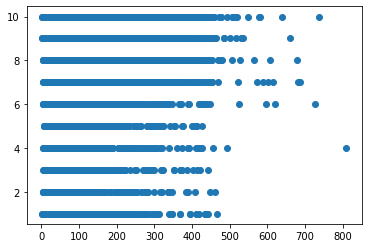

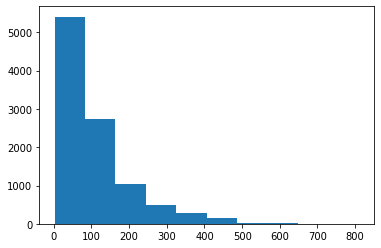

In [319]:
pyplot.scatter(resultdf2['wordcount'], resultdf2['error'])
pyplot.show()
pyplot.scatter(resultdf2['wordcount'], resultdf2['actual'])
pyplot.show()
plt.hist(resultdf2['wordcount'])
plt.show()

In [325]:
len([wordcounts_lda[i] for i in resultdf2.index])

10166

In [328]:
np.cov([wordcounts_lda[i] for i in resultdf2.index], resultdf2['error'])


array([[ 8.58962633e+03, -1.08722964e+01],
       [-1.08722964e+01,  1.88971457e+00]])

In [329]:
[wordcounts_lda[i] for i in resultdf2.index]

[152,
 56,
 96,
 254,
 66,
 42,
 42,
 366,
 80,
 46,
 24,
 9,
 8,
 79,
 21,
 166,
 81,
 70,
 319,
 64,
 99,
 26,
 72,
 143,
 74,
 200,
 439,
 101,
 233,
 44,
 39,
 136,
 34,
 87,
 356,
 14,
 240,
 49,
 184,
 31,
 60,
 256,
 102,
 18,
 27,
 69,
 179,
 72,
 157,
 114,
 40,
 164,
 184,
 76,
 313,
 16,
 209,
 188,
 49,
 67,
 76,
 58,
 87,
 85,
 114,
 151,
 55,
 269,
 61,
 79,
 148,
 9,
 73,
 97,
 10,
 142,
 235,
 435,
 178,
 41,
 89,
 105,
 100,
 108,
 110,
 13,
 126,
 82,
 300,
 206,
 70,
 284,
 69,
 51,
 33,
 77,
 60,
 153,
 93,
 53,
 162,
 26,
 81,
 7,
 122,
 55,
 25,
 63,
 52,
 67,
 26,
 119,
 190,
 99,
 138,
 55,
 39,
 54,
 122,
 120,
 144,
 69,
 165,
 55,
 20,
 45,
 53,
 65,
 67,
 69,
 62,
 205,
 21,
 166,
 47,
 236,
 103,
 111,
 112,
 17,
 127,
 77,
 130,
 11,
 25,
 12,
 32,
 82,
 91,
 58,
 205,
 56,
 23,
 7,
 68,
 110,
 115,
 281,
 53,
 85,
 259,
 234,
 94,
 44,
 95,
 244,
 63,
 99,
 190,
 63,
 29,
 85,
 123,
 17,
 56,
 32,
 55,
 72,
 41,
 11,
 48,
 76,
 29,
 83,
 38,
 27,
 72,
 76

In [343]:
resultdf2.loc[resultdf2['wordcount'] == 0]

,predict,actual,error,wordcount
18179,7.653444,10,2.346556,0


In [347]:
ldadf.iloc[18179]

0     0.02
1     0.02
2     0.02
3     0.02
4     0.02
5     0.02
6     0.02
7     0.02
8     0.02
9     0.02
10    0.02
11    0.02
12    0.02
13    0.02
14    0.02
15    0.02
16    0.02
17    0.02
18    0.02
19    0.02
20    0.02
21    0.02
22    0.02
23    0.02
24    0.02
25    0.02
26    0.02
27    0.02
28    0.02
29    0.02
30    0.02
31    0.02
32    0.02
33    0.02
34    0.02
35    0.02
36    0.02
37    0.02
38    0.02
39    0.02
40    0.02
41    0.02
42    0.02
43    0.02
44    0.02
45    0.02
46    0.02
47    0.02
48    0.02
49    0.02
Name: 18179, dtype: float64

In [9]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(review_lda_model, review_bow_corpus, review_dictionary)
LDAvis_prepared

C:\Users\asus\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.129847  0.022209       1        1  7.844852
21     0.249428 -0.034207       2        1  7.233527
46     0.226497 -0.056446       3        1  6.271194
15     0.218719 -0.018903       4        1  6.090124
4      0.231866 -0.028134       5        1  5.905312
25     0.123421  0.115045       6        1  4.962971
27     0.133342  0.028123       7        1  3.360097
42     0.151327 -0.129939       8        1  3.349743
20     0.188547 -0.179569       9        1  3.262101
30     0.088148  0.010681      10        1  3.146205
19     0.194090 -0.080021      11        1  3.067161
10     0.131889  0.032218      12        1  3.064648
31     0.171113 -0.048636      13        1  2.852542
41     0.174600 -0.125392      14        1  2.776527
7      0.099103 -0.002651      15        1  2.444002
34    -0.013744  0.167798      16        1  2.227846
36     0.067367  0.154959      17        1  1.990993
16     0.120513 -0.099335      18        1  1.836722
35    -0.030839  0.153080      19        1  1.794703
24     0.026359 -0.012325      20        1  1.608283
17    -0.023679  0.038820      21        1  1.562372
1     -0.046834  0.179736      22        1  1.496273
6     -0.053237  0.172401      23        1  1.455005
2     -0.039198  0.052423      24        1  1.447355
8      0.033669  0.066624      25        1  1.428416
40    -0.014606  0.042430      26        1  1.339926
39    -0.085333  0.037543      27        1  1.207800
22     0.004099  0.106079      28        1  1.176135
28    -0.069325  0.030504      29        1  1.156646
13     0.020827 -0.138247      30        1  1.028967
32    -0.078697  0.105650      31        1  0.919931
47    -0.062287 -0.091789      32        1  0.880425
18    -0.032389  0.074478      33        1  0.862699
5     -0.059134  0.138021      34        1  0.858884
49    -0.080019  0.003143      35        1  0.852611
12    -0.015580 -0.110958      36        1  0.846718
48    -0.027773  0.110273      37        1  0.835285
44    -0.139347  0.019734      38        1  0.715424
3      0.003349 -0.020276      39        1  0.672521
37    -0.073159  0.059049      40        1  0.645923
38    -0.161417 -0.075378      41        1  0.545632
26    -0.106444  0.110240      42        1  0.457143
0     -0.180095 -0.125096      43        1  0.435558
33    -0.152475 -0.001496      44        1  0.410614
23    -0.191073 -0.101250      45        1  0.367555
43    -0.163965 -0.030847      46        1  0.337445
14    -0.235852 -0.136451      47        1  0.311951
45    -0.224611 -0.102803      48        1  0.237980
29    -0.212327 -0.105221      49        1  0.222343
9     -0.214682 -0.175891      50        1  0.194906, topic_info=     Category           Freq       Term          Total  loglift  logprob
83    Default  114485.000000       film  114485.000000  30.0000  30.0000
28    Default  104139.000000      movie  104139.000000  29.0000  29.0000
0     Default   17456.000000     action   17456.000000  28.0000  28.0000
7     Default   38341.000000  character   38341.000000  27.0000  27.0000
42    Default   31986.000000      story   31986.000000  26.0000  26.0000
598   Default    7842.000000       book    7842.000000  25.0000  25.0000
384   Default    7580.000000   original    7580.000000  24.0000  24.0000
20    Default   32441.000000       good   32441.000000  23.0000  23.0000
474   Default   20476.000000      first   20476.000000  22.0000  22.0000
168   Default   22427.000000       love   22427.000000  21.0000  21.0000
141   Default   28867.000000      watch   28867.000000  20.0000  20.0000
189   Default   18228.000000       best   18228.000000  19.0000  19.0000
694   Default    6590.000000     horror    6590.000000  18.0000  18.0000
31    Default   18528.000000       play   18528.000000  17.0000  17.0000
36    Default   43035.000000        see   43035.000000  16.0000  16.0000
671   Default    9676.000000     